## Q63. 크롤링 어쩌고

- 네이버 검색에서 관심 주제와 기사 수를 입력하면,
- 그만큼 출력하는 크롤링 프로그램을 작성하여 다음 사항을 수행하세요.

- 기사 제목과 링크를 데이터프레임으로 가져온 후,  
- 본문 내용에서 한글 단어만 출력하여 형태소 분석
- 불용어 처리 stop_words
- 빈도분석, 시각화
- 최근 국내 'AI'와 관련하여,
- 가장 많이 언급되는 단어에 대한 빈도분석 및 시각화
- AI 분야에서의 유의할 만한 트랜드 정보 및 인사이트 도출

# 기사 제목과 링크를 데이터프레임으로 가져온 후,  

In [68]:
import urllib
import pandas as pd
import json
import requests

In [231]:
from bs4 import BeautifulSoup
import re

In [54]:
client_id = "ISdXTGuV8Tdqx9fNxPgz"
client_secret = "e2kcexi37t"
sort = 'sim' # 유사도

def getNewsAbout(keyword, display=100, start=1):
    """display 1~100,
    start 1~1000"""
    encText = urllib.parse.quote(keyword)
    url = f'https://openapi.naver.com/v1/search/news?query={encText}&display={display}&sort={sort}&start={start}'

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    
    df = pd.DataFrame() 
    if(rescode==200):
        response_body = response.read()
    else:
        print('getNewsAbout : crawling about ', name, 'failed.')
        print("Error Code:" + rescode)
        return df # 실패시 빈 DataFrame을 return
        
    df = response_body.decode('utf-8')
    df = json.loads(df)
    df = pd.DataFrame(df['items'])
    
    return df

In [122]:
keyword = 'AI'
news_num = 50
maxdis = 100

In [123]:
fullpn = news_num//maxdis
lastpnn = news_num%maxdis

In [125]:
df_tot = pd.DataFrame()
for p in range(fullpn):
    start = p*100+1
    df = getNewsAbout(keyword, display=maxdis, start=start)
    df_tot = pd.concat([df_tot, df])
df = getNewsAbout(keyword, display=lastpnn, start=(start+maxdis))
df_tot = pd.concat([df_tot, df])
df_tot.reset_index(drop=True, inplace=True)
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         50 non-null     object
 1   originallink  50 non-null     object
 2   link          50 non-null     object
 3   description   50 non-null     object
 4   pubDate       50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [201]:
df_tot

,title,originallink,link,description,pubDate
0,"포스코그룹, <b>AI</b>기술 자문위원회 신설…&quot;전략 수립에 도움될 것...",http://it.chosun.com/site/data/html_dir/2022/0...,http://it.chosun.com/site/data/html_dir/2022/0...,포스코그룹이 인공지능(<b>AI</b>)기술 자문위원회를 신설하고 5일 서울 포스코...,"Fri, 05 Aug 2022 11:02:00 +0900"
1,한밤 충무대교 난간 넘어간 40대 &apos;<b>AI</b> 시스템&apos;이 ...,https://www.yna.co.kr/view/AKR2022080307330005...,https://n.news.naver.com/mnews/article/001/001...,인공지능(<b>AI</b>) 자살 예방 시스템&apos;이 세상과 등지려 한 40대...,"Wed, 03 Aug 2022 11:36:00 +0900"
2,"[특징주]드림어스컴퍼니, 아마존 2조에 아이로봇 인수..<b>AI</b> 로봇청소기...",http://www.fnnews.com/news/202208081048073553,https://n.news.naver.com/mnews/article/014/000...,드림어스컴퍼니가 아마존이 2조원에 달하는 로봇청소기 업체 아이로봇을 인수했다는 소식...,"Mon, 08 Aug 2022 10:51:00 +0900"
3,&apos;인공지능(<b>AI</b>) 활용 간담회&apos;에서 발언하는 김소영 ...,http://www.newsis.com/view/?id=NISI20220804_00...,https://n.news.naver.com/mnews/article/003/001...,김소영 금융위원회 부위원장이 4일 서울 마포구에서 열린 &apos;인공지능(<b>A...,"Thu, 04 Aug 2022 11:16:00 +0900"
4,"[산업 이모저모] KT-NIPA, <b>AI</b>·DX 인재 양성 맞손...ICT...",http://www.greened.kr/news/articleView.html?id...,http://www.greened.kr/news/articleView.html?id...,"양사는 이번 협약을 통해 인공지능(<b>AI</b>)·DX 부문 인재 양성은 물론,...","Mon, 08 Aug 2022 16:49:00 +0900"
5,"윤선생, <b>AI</b> 영어 말하기 이벤트 &apos;말하톤 대회&apos; 개최",http://www.wolyo.co.kr/news/articleView.html?i...,http://www.wolyo.co.kr/news/articleView.html?i...,이번 이벤트는 제한 시간 내 <b>AI</b>와 영어로 대화를 나누며 회화 실력을 ...,"Mon, 08 Aug 2022 09:16:00 +0900"
6,"KT·NIPA, <b>AI</b>·DX 분야 인재양성 MOU 체결",http://www.g-enews.com/ko-kr/news/article/news...,http://www.g-enews.com/ko-kr/news/article/news...,인공지능(<b>AI</b>)·DX 분야 인재 양성을 함께 추진하는 업무협약(MOU)...,"Mon, 08 Aug 2022 11:30:00 +0900"
7,"에듀윌, 공무원 합격진단 &apos;<b>AI</b>-Pass&apos;…예측 서비...",http://www.newsis.com/view/?id=NISX20220804_00...,https://n.news.naver.com/mnews/article/003/001...,종합교육기업 에듀윌은 올해 인공지능(<b>AI</b>) 합격비서 &apos;<b>A...,"Thu, 04 Aug 2022 10:02:00 +0900"
8,가명정보 재사용 허용 &apos;금융 <b>AI</b> 데이터 라이브러리&apos; 구축,http://www.edaily.co.kr/news/newspath.asp?news...,https://n.news.naver.com/mnews/article/018/000...,인공지능(<b>AI</b>) 데이터 라이브러리’를 구축한다. 데이터 셋을 구축해도 ...,"Thu, 04 Aug 2022 10:01:00 +0900"
9,"KB증권, ‘<b>AI</b> 상담 콜봇’ 서비스 오픈",http://www.joseilbo.com/news/news_read.php?uid...,https://n.news.naver.com/mnews/article/123/000...,KB증권은 고객 만족 및 편의 증대를 위해 인공지능(<b>AI</b>) 기술을 적용...,"Fri, 05 Aug 2022 17:46:00 +0900"


# 링크의 본문 내용을 가져와서,

## 하나의 링크로 확인

In [202]:
df_nl = pd.read_pickle('./dataset/news_links_2208082306.pkl')

In [203]:
df_nl.head(2)

,title,originallink,link,description,pubDate
0,"포스코그룹, <b>AI</b>기술 자문위원회 신설…&quot;전략 수립에 도움될 것...",http://it.chosun.com/site/data/html_dir/2022/0...,http://it.chosun.com/site/data/html_dir/2022/0...,포스코그룹이 인공지능(<b>AI</b>)기술 자문위원회를 신설하고 5일 서울 포스코...,"Fri, 05 Aug 2022 11:02:00 +0900"
1,한밤 충무대교 난간 넘어간 40대 &apos;<b>AI</b> 시스템&apos;이 ...,https://www.yna.co.kr/view/AKR2022080307330005...,https://n.news.naver.com/mnews/article/001/001...,인공지능(<b>AI</b>) 자살 예방 시스템&apos;이 세상과 등지려 한 40대...,"Wed, 03 Aug 2022 11:36:00 +0900"


In [204]:
link = df_nl.link.loc[1]
print(link)

https://n.news.naver.com/mnews/article/001/0013351539?sid=105


In [205]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

In [206]:
res1 = requests.get(link, headers=headers)

In [207]:
res1.status_code

200

In [208]:
html = res1.text
html[:500]

'<!doctype html>\n<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n\t\t<meta property="og:title" content="한밤 충무대교 난간 넘어간 40대 \'AI 시스템\'이 구조했다">\n\t\t<meta property="og:type" content="article">'

In [209]:
html

'<!doctype html>\n<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n\t\t<meta property="og:title" content="한밤 충무대교 난간 넘어간 40대 \'AI 시스템\'이 구조했다">\n\t\t<meta property="og:type" content="article">\n\t\t<meta property="og:url" content="https://n.news.naver.com/mnews/article/001/0013351539?sid&#x3D;105">\n\t\t<meta property="og:image" content="https://imgnews.pstatic.net/image/001/2022/08/03/AKR20220803073300052_01_i_P4_20220803113616558.jpg">\n\t\t<meta property="og:description" content="극단 선택 시도자의 행동 특성을 분석해 위험 상황을 포착하는 \'인공지능(AI) 자살 예방 시스템\'이 세상과 등지려 한 40대를 구조한 사실이 알려졌다. 3일 경남 통영시에 따르면 지난 1일 오후 11시 17분께 통영">\n\t\t<meta property="og:article:author" content="연합뉴스 | 네이

In [210]:
soup = BeautifulSoup(html, 'html.parser')

In [211]:
content = soup.find(id='dic_area').get_text()
content

'\n\n\n\n\n한밤 충무대교 난간 넘어간 40대…AI 시스템이 구조[통영시 제공. 재판매 및 DB 금지](통영=연합뉴스) 한지은 기자 = 극단 선택 시도자의 행동 특성을 분석해 위험 상황을 포착하는 \'인공지능(AI) 자살 예방 시스템\'이 세상과 등지려 한 40대를 구조한 사실이 알려졌다.    3일 경남 통영시에 따르면 지난 1일 오후 11시 17분께 통영시 충무대교를 배회하다가 대교 난간을 넘어 투신하려 한 A(44)씨를 AI 시스템이 발견했다.     AI 시스템은 즉시 위험 경보를 발령하고 경찰에 현장 출동을 요청했다.    사건 접수 7분 만에 현장에 달려간 경찰은 A씨를 설득해 무사히 귀가할 수 있게 했다.    통영시는 추후 같은 일이 반복되지 않도록 A씨에게 지역 보건센터가 운영하는 정신상담 프로그램을 안내했다.    시가 운영 중인 \'AI 자살 예방 시스템\'은 2021년 스마트시티 통합플랫폼 구축 특화사업 중 하나다.    AI 딥러닝을 기반으로 극단 선택 행동 특성을 학습하고 분석해 위험 행동을 사전에 포착하는 기술이다.    시는 극단 선택을 예방하고자 통영대교와 충무대교 폐쇄회로(CC)TV 영상 배경 노이즈를 제거하고, AI에 사람의 기본 행동 특성과 위험 행위 데이터를 꾸준히 학습시켰다.    최근에는 CCTV 영상 분석과 컴파일링(컴퓨터 언어 코드 변환) 속도 향상을 위해 딥러닝 기법을 확장 적용해 객체 분석 시간을 단축하고 정확도를 높였다.    시는 "OECD 자살률 1위라는 불명예와 사망자 가족의 불행을 막을 수 있도록 융복합 AI 기술을 이용한 자살 예방에 노력하고 있다"며 "행동 특성 등 다양한 패턴 분석을 통한 시스템 고도화로 극단 선택 예방에 일조하겠다"고 밝혔다.    ※ 우울감 등 말하기 어려운 고민이 있거나 주변에 이런 어려움을 겪는 가족·지인이 있을 경우 자살 예방 핫라인 ☎1577-0199, 희망의 전화 ☎129, 생명의 전화 ☎1588-9191, 청소년 전화 ☎1388 등에서 24시간 전문가의 상담을 

## link형식 보고 고르기

In [212]:
news_links = df_nl.loc[:, ['title', 'link']]
news_links.head()

,title,link
0,"포스코그룹, <b>AI</b>기술 자문위원회 신설…&quot;전략 수립에 도움될 것...",http://it.chosun.com/site/data/html_dir/2022/0...
1,한밤 충무대교 난간 넘어간 40대 &apos;<b>AI</b> 시스템&apos;이 ...,https://n.news.naver.com/mnews/article/001/001...
2,"[특징주]드림어스컴퍼니, 아마존 2조에 아이로봇 인수..<b>AI</b> 로봇청소기...",https://n.news.naver.com/mnews/article/014/000...
3,&apos;인공지능(<b>AI</b>) 활용 간담회&apos;에서 발언하는 김소영 ...,https://n.news.naver.com/mnews/article/003/001...
4,"[산업 이모저모] KT-NIPA, <b>AI</b>·DX 인재 양성 맞손...ICT...",http://www.greened.kr/news/articleView.html?id...


In [214]:
for i, l in enumerate(news_links.link):
    print(i, l)

0 http://it.chosun.com/site/data/html_dir/2022/08/05/2022080500753.html
1 https://n.news.naver.com/mnews/article/001/0013351539?sid=105
2 https://n.news.naver.com/mnews/article/014/0004879481?sid=101
3 https://n.news.naver.com/mnews/article/003/0011344473?sid=004
4 http://www.greened.kr/news/articleView.html?idxno=297099
5 http://www.wolyo.co.kr/news/articleView.html?idxno=209503
6 http://www.g-enews.com/ko-kr/news/article/news_all/20220808112653771386fbbc3c26_1/article.html
7 https://n.news.naver.com/mnews/article/003/0011344211?sid=101
8 https://n.news.naver.com/mnews/article/018/0005283686?sid=101
9 https://n.news.naver.com/mnews/article/123/0002282553?sid=101
10 https://n.news.naver.com/mnews/article/001/0013353594?sid=101
11 https://n.news.naver.com/mnews/article/215/0001046925?sid=101
12 https://n.news.naver.com/mnews/article/011/0004084023?sid=101
13 https://n.news.naver.com/mnews/article/366/0000831953?sid=101
14 https://n.news.naver.com/mnews/article/014/0004879011?sid=101
15 

- 네이버 뉴스 링크만
- https://n.news.naver.com/mnews/article : #dic_area

In [215]:
count = 0 
for l in news_links.link:
    if l.startswith('https://n.news.naver.com/mnews/article/'):
        print(l)
        count += 1
count

https://n.news.naver.com/mnews/article/001/0013351539?sid=105
https://n.news.naver.com/mnews/article/014/0004879481?sid=101
https://n.news.naver.com/mnews/article/003/0011344473?sid=004
https://n.news.naver.com/mnews/article/003/0011344211?sid=101
https://n.news.naver.com/mnews/article/018/0005283686?sid=101
https://n.news.naver.com/mnews/article/123/0002282553?sid=101
https://n.news.naver.com/mnews/article/001/0013353594?sid=101
https://n.news.naver.com/mnews/article/215/0001046925?sid=101
https://n.news.naver.com/mnews/article/011/0004084023?sid=101
https://n.news.naver.com/mnews/article/366/0000831953?sid=101
https://n.news.naver.com/mnews/article/014/0004879011?sid=101
https://n.news.naver.com/mnews/article/079/0003672160?sid=101
https://n.news.naver.com/mnews/article/015/0004732868?sid=101
https://n.news.naver.com/mnews/article/056/0011315651?sid=102
https://n.news.naver.com/mnews/article/001/0013354294?sid=105
https://n.news.naver.com/mnews/article/021/0002525095?sid=101
https://

28

## link로 본문내용가져오기

In [216]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

In [223]:
li = []
for idx, l in enumerate(news_links.link):
    if l.startswith('https://n.news.naver.com/mnews/article/'):
        response = requests.get(l, headers=headers)
        time.sleep(0.3)
        if response.status_code == 200:
            html = response.text
            soup = BeautifulSoup(html, 'html.parser')
            content = soup.find(id='dic_area').get_text()
        else:
            content = " "
    else:
        content = " "
    li.append(content)
li

[' ',
 '\n\n\n\n\n한밤 충무대교 난간 넘어간 40대…AI 시스템이 구조[통영시 제공. 재판매 및 DB 금지](통영=연합뉴스) 한지은 기자 = 극단 선택 시도자의 행동 특성을 분석해 위험 상황을 포착하는 \'인공지능(AI) 자살 예방 시스템\'이 세상과 등지려 한 40대를 구조한 사실이 알려졌다.    3일 경남 통영시에 따르면 지난 1일 오후 11시 17분께 통영시 충무대교를 배회하다가 대교 난간을 넘어 투신하려 한 A(44)씨를 AI 시스템이 발견했다.     AI 시스템은 즉시 위험 경보를 발령하고 경찰에 현장 출동을 요청했다.    사건 접수 7분 만에 현장에 달려간 경찰은 A씨를 설득해 무사히 귀가할 수 있게 했다.    통영시는 추후 같은 일이 반복되지 않도록 A씨에게 지역 보건센터가 운영하는 정신상담 프로그램을 안내했다.    시가 운영 중인 \'AI 자살 예방 시스템\'은 2021년 스마트시티 통합플랫폼 구축 특화사업 중 하나다.    AI 딥러닝을 기반으로 극단 선택 행동 특성을 학습하고 분석해 위험 행동을 사전에 포착하는 기술이다.    시는 극단 선택을 예방하고자 통영대교와 충무대교 폐쇄회로(CC)TV 영상 배경 노이즈를 제거하고, AI에 사람의 기본 행동 특성과 위험 행위 데이터를 꾸준히 학습시켰다.    최근에는 CCTV 영상 분석과 컴파일링(컴퓨터 언어 코드 변환) 속도 향상을 위해 딥러닝 기법을 확장 적용해 객체 분석 시간을 단축하고 정확도를 높였다.    시는 "OECD 자살률 1위라는 불명예와 사망자 가족의 불행을 막을 수 있도록 융복합 AI 기술을 이용한 자살 예방에 노력하고 있다"며 "행동 특성 등 다양한 패턴 분석을 통한 시스템 고도화로 극단 선택 예방에 일조하겠다"고 밝혔다.    ※ 우울감 등 말하기 어려운 고민이 있거나 주변에 이런 어려움을 겪는 가족·지인이 있을 경우 자살 예방 핫라인 ☎1577-0199, 희망의 전화 ☎129, 생명의 전화 ☎1588-9191, 청소년 전화 ☎1388 등에서 24시간 전문

In [225]:
sr = pd.Series(li)
sr

0                                                      
1     \n\n\n\n\n한밤 충무대교 난간 넘어간 40대…AI 시스템이 구조[통영시 제공...
2     \n\t\t\t  [파이낸셜뉴스] 드림어스컴퍼니가 아마존이 2조원에 달하는 로봇청소...
3     \n\n\n\n\n[서울=뉴시스] 김소영 금융위원회 부위원장이 4일 서울 마포구에서...
4                                                      
5                                                      
6                                                      
7     \n\n\n\n\n[서울=뉴시스] 에듀윌 'AI-Pass'. (이미지=에듀윌 제공)...
8     \n금융위, '금융 분야 인공지능 활용 활성화 간담회' 개최사용 후 파기 비효율 없...
9     \n\n\n\n\n     KB증권은 고객 만족 및 편의 증대를 위해 인공지능(AI...
10    \n\n\n\n\n에프앤가이드·리퍼블릭케이-연세대 금융투자AI 업무협약왼쪽부터 에프...
11    \n"금융분야에 인공지능이 정착되기 위해서는 시행착오를 겪을 수밖에 없을 것입니다....
12    \n저장된 데이터 필요할때마다 인출망분리·클라우드 규제도 손보기로\n\n\n\n김소...
13    \n\t\t\t        인공지능(AI) 전문 기업 딥브레인AI는 하나은행 모바...
14    \n\t\t\t  [파이낸셜뉴스] 인공지능(AI) 스타트업 '마크비전'과 트래픽 제...
15                                                     
16    \n핵심요약AI 분야 '학계·산업계' 전문가 20여명으로 구성…5일 첫 회의다음 달...
17                                              

# 한글 단어만 출력, 

In [228]:
sr = pd.read_pickle('./dataset/contents_2208082332.pkl')

In [230]:
text = " ".join(sr)
text

'  \n\n\n\n\n한밤 충무대교 난간 넘어간 40대…AI 시스템이 구조[통영시 제공. 재판매 및 DB 금지](통영=연합뉴스) 한지은 기자 = 극단 선택 시도자의 행동 특성을 분석해 위험 상황을 포착하는 \'인공지능(AI) 자살 예방 시스템\'이 세상과 등지려 한 40대를 구조한 사실이 알려졌다.    3일 경남 통영시에 따르면 지난 1일 오후 11시 17분께 통영시 충무대교를 배회하다가 대교 난간을 넘어 투신하려 한 A(44)씨를 AI 시스템이 발견했다.     AI 시스템은 즉시 위험 경보를 발령하고 경찰에 현장 출동을 요청했다.    사건 접수 7분 만에 현장에 달려간 경찰은 A씨를 설득해 무사히 귀가할 수 있게 했다.    통영시는 추후 같은 일이 반복되지 않도록 A씨에게 지역 보건센터가 운영하는 정신상담 프로그램을 안내했다.    시가 운영 중인 \'AI 자살 예방 시스템\'은 2021년 스마트시티 통합플랫폼 구축 특화사업 중 하나다.    AI 딥러닝을 기반으로 극단 선택 행동 특성을 학습하고 분석해 위험 행동을 사전에 포착하는 기술이다.    시는 극단 선택을 예방하고자 통영대교와 충무대교 폐쇄회로(CC)TV 영상 배경 노이즈를 제거하고, AI에 사람의 기본 행동 특성과 위험 행위 데이터를 꾸준히 학습시켰다.    최근에는 CCTV 영상 분석과 컴파일링(컴퓨터 언어 코드 변환) 속도 향상을 위해 딥러닝 기법을 확장 적용해 객체 분석 시간을 단축하고 정확도를 높였다.    시는 "OECD 자살률 1위라는 불명예와 사망자 가족의 불행을 막을 수 있도록 융복합 AI 기술을 이용한 자살 예방에 노력하고 있다"며 "행동 특성 등 다양한 패턴 분석을 통한 시스템 고도화로 극단 선택 예방에 일조하겠다"고 밝혔다.    ※ 우울감 등 말하기 어려운 고민이 있거나 주변에 이런 어려움을 겪는 가족·지인이 있을 경우 자살 예방 핫라인 ☎1577-0199, 희망의 전화 ☎129, 생명의 전화 ☎1588-9191, 청소년 전화 ☎1388 등에서 24시간 전문가의 상담

In [234]:
text = re.sub('[^가-힣]+', ' ', text)
text

' 한밤 충무대교 난간 넘어간 대 시스템이 구조 통영시 제공 재판매 및 금지 통영 연합뉴스 한지은 기자 극단 선택 시도자의 행동 특성을 분석해 위험 상황을 포착하는 인공지능 자살 예방 시스템 이 세상과 등지려 한 대를 구조한 사실이 알려졌다 일 경남 통영시에 따르면 지난 일 오후 시 분께 통영시 충무대교를 배회하다가 대교 난간을 넘어 투신하려 한 씨를 시스템이 발견했다 시스템은 즉시 위험 경보를 발령하고 경찰에 현장 출동을 요청했다 사건 접수 분 만에 현장에 달려간 경찰은 씨를 설득해 무사히 귀가할 수 있게 했다 통영시는 추후 같은 일이 반복되지 않도록 씨에게 지역 보건센터가 운영하는 정신상담 프로그램을 안내했다 시가 운영 중인 자살 예방 시스템 은 년 스마트시티 통합플랫폼 구축 특화사업 중 하나다 딥러닝을 기반으로 극단 선택 행동 특성을 학습하고 분석해 위험 행동을 사전에 포착하는 기술이다 시는 극단 선택을 예방하고자 통영대교와 충무대교 폐쇄회로 영상 배경 노이즈를 제거하고 에 사람의 기본 행동 특성과 위험 행위 데이터를 꾸준히 학습시켰다 최근에는 영상 분석과 컴파일링 컴퓨터 언어 코드 변환 속도 향상을 위해 딥러닝 기법을 확장 적용해 객체 분석 시간을 단축하고 정확도를 높였다 시는 자살률 위라는 불명예와 사망자 가족의 불행을 막을 수 있도록 융복합 기술을 이용한 자살 예방에 노력하고 있다 며 행동 특성 등 다양한 패턴 분석을 통한 시스템 고도화로 극단 선택 예방에 일조하겠다 고 밝혔다 우울감 등 말하기 어려운 고민이 있거나 주변에 이런 어려움을 겪는 가족 지인이 있을 경우 자살 예방 핫라인 희망의 전화 생명의 전화 청소년 전화 등에서 시간 전문가의 상담을 받을 수 있습니다 파이낸셜뉴스 드림어스컴퍼니가 아마존이 조원에 달하는 로봇청소기 업체 아이로봇을 인수했다는 소식에 인공지능 로봇청소기 에이클 부각으로 상승세다 일 오전 시 분 현재 드림어스컴퍼니는 전 거래일 대비 오른 원에 거래되고 있다 이날 외신에 따르면 아마존은 로봇청소기 제조사 아이로봇을 억달러 약 

# 형태소 분석

In [235]:
import konlpy
from konlpy.tag import Okt
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [236]:
okt = Okt()
morph = okt.pos(text)

In [241]:
noun_list = []
for word, tag in morph:
    if (tag == 'Noun') and (len(word) > 1):
        noun_list.append(word)
print(noun_list)

['한밤', '충무', '대교', '난간', '시스템', '구조', '통영시', '제공', '재판매', '금지', '통영', '연합뉴스', '한지은', '기자', '극단', '선택', '시도', '자의', '행동', '특성', '분석', '위험', '상황', '포착', '인공', '지능', '자살', '예방', '시스템', '세상', '등지', '구조', '사실', '경남', '통영시', '지난', '오후', '통영시', '충무', '대교', '배회', '대교', '난간', '투신', '시스템', '발견', '시스템', '즉시', '위험', '경보', '발령', '경찰', '현장', '출동', '요청', '사건', '접수', '현장', '경찰', '설득', '귀가', '통영시', '추후', '반복', '지역', '보건', '센터', '운영', '정신', '상담', '프로그램', '시가', '운영', '중인', '자살', '예방', '시스템', '스마트', '시티', '통합', '플랫폼', '구축', '사업', '하나', '러닝', '기반', '극단', '선택', '행동', '특성', '학습', '분석', '위험', '행동', '사전', '포착', '기술', '극단', '선택', '예방', '통영', '대교', '충무', '대교', '폐쇄회', '영상', '배경', '노이즈', '제거', '사람', '기본', '행동', '특성', '위험', '행위', '데이터', '학습', '최근', '영상', '분석', '컴파일', '컴퓨터', '언어', '코드', '변환', '속도', '향상', '위해', '러닝', '기법', '확장', '적용', '객체', '분석', '시간', '단축', '정확도', '자살률', '불명예', '사망자', '가족', '불행', '복합', '기술', '이용', '자살', '예방', '노력', '행동', '특성', '패턴', '분석', '통한', '시스템', '고도화', '극단', '선택', '예방', '일조', '우울', '고민', '주변',

In [244]:
count = Counter(noun_list)
data = dict(count.most_common())
data

{'금융': 93,
 '기술': 77,
 '지능': 72,
 '데이터': 67,
 '인공': 64,
 '활용': 58,
 '개발': 51,
 '위원회': 43,
 '분야': 41,
 '구축': 38,
 '통해': 32,
 '제공': 30,
 '서비스': 29,
 '정보': 27,
 '산업': 27,
 '포스코': 27,
 '운영': 24,
 '기반': 24,
 '위해': 24,
 '적용': 24,
 '솔루션': 24,
 '라이브러리': 23,
 '서울': 22,
 '계획': 22,
 '도입': 21,
 '의료': 21,
 '현장': 20,
 '전문가': 20,
 '금융위': 20,
 '규제': 20,
 '혁신': 19,
 '그룹': 19,
 '업무': 18,
 '관리': 18,
 '활성화': 17,
 '이번': 17,
 '구성': 17,
 '체계': 17,
 '시스템': 16,
 '빅데이터': 15,
 '재사용': 15,
 '보호': 15,
 '지원': 15,
 '학계': 15,
 '현재': 14,
 '사진': 14,
 '기업': 14,
 '연구원': 14,
 '분석': 13,
 '센터': 13,
 '영상': 13,
 '로봇청소기': 13,
 '기능': 13,
 '원장': 13,
 '컨소시엄': 13,
 '허용': 13,
 '추진': 13,
 '기관': 13,
 '분리': 13,
 '테스트': 13,
 '연구': 13,
 '개선': 13,
 '자문': 13,
 '중국': 13,
 '반도체': 13,
 '사업': 12,
 '시간': 12,
 '부위': 12,
 '고객': 12,
 '참여': 12,
 '가명': 12,
 '검증': 12,
 '디지털': 12,
 '미래': 12,
 '카메라': 12,
 '인지': 12,
 '예방': 11,
 '상담': 11,
 '김소영': 11,
 '간담': 11,
 '대해': 11,
 '예정': 11,
 '발생': 11,
 '클라우드': 11,
 '투자': 11,
 '치매': 11,
 '케미칼': 11,
 '보건': 10,
 '프

In [299]:
import pickle

In [302]:
with open('./dataset/data.pkl', 'rb') as fr:
    dict_ = pickle.load(fr)

In [303]:
dict_

{'금융': 93,
 '기술': 77,
 '지능': 72,
 '데이터': 67,
 '인공': 64,
 '활용': 58,
 '개발': 51,
 '위원회': 43,
 '분야': 41,
 '구축': 38,
 '통해': 32,
 '제공': 30,
 '서비스': 29,
 '정보': 27,
 '산업': 27,
 '포스코': 27,
 '운영': 24,
 '기반': 24,
 '위해': 24,
 '적용': 24,
 '솔루션': 24,
 '라이브러리': 23,
 '서울': 22,
 '계획': 22,
 '도입': 21,
 '의료': 21,
 '현장': 20,
 '전문가': 20,
 '금융위': 20,
 '규제': 20,
 '혁신': 19,
 '그룹': 19,
 '업무': 18,
 '관리': 18,
 '활성화': 17,
 '이번': 17,
 '구성': 17,
 '체계': 17,
 '시스템': 16,
 '빅데이터': 15,
 '재사용': 15,
 '보호': 15,
 '지원': 15,
 '학계': 15,
 '현재': 14,
 '사진': 14,
 '기업': 14,
 '연구원': 14,
 '분석': 13,
 '센터': 13,
 '영상': 13,
 '로봇청소기': 13,
 '기능': 13,
 '원장': 13,
 '컨소시엄': 13,
 '허용': 13,
 '추진': 13,
 '기관': 13,
 '분리': 13,
 '테스트': 13,
 '연구': 13,
 '개선': 13,
 '자문': 13,
 '중국': 13,
 '반도체': 13,
 '사업': 12,
 '시간': 12,
 '부위': 12,
 '고객': 12,
 '참여': 12,
 '가명': 12,
 '검증': 12,
 '디지털': 12,
 '미래': 12,
 '카메라': 12,
 '인지': 12,
 '예방': 11,
 '상담': 11,
 '김소영': 11,
 '간담': 11,
 '대해': 11,
 '예정': 11,
 '발생': 11,
 '클라우드': 11,
 '투자': 11,
 '치매': 11,
 '케미칼': 11,
 '보건': 10,
 '프

# 불용어 처리 stop_words

In [249]:
data

{'금융': 93,
 '기술': 77,
 '지능': 72,
 '데이터': 67,
 '인공': 64,
 '활용': 58,
 '개발': 51,
 '위원회': 43,
 '분야': 41,
 '구축': 38,
 '통해': 32,
 '제공': 30,
 '서비스': 29,
 '정보': 27,
 '산업': 27,
 '포스코': 27,
 '운영': 24,
 '기반': 24,
 '위해': 24,
 '적용': 24,
 '솔루션': 24,
 '라이브러리': 23,
 '서울': 22,
 '계획': 22,
 '도입': 21,
 '의료': 21,
 '현장': 20,
 '전문가': 20,
 '금융위': 20,
 '규제': 20,
 '혁신': 19,
 '그룹': 19,
 '업무': 18,
 '관리': 18,
 '활성화': 17,
 '이번': 17,
 '구성': 17,
 '체계': 17,
 '시스템': 16,
 '빅데이터': 15,
 '재사용': 15,
 '보호': 15,
 '지원': 15,
 '학계': 15,
 '현재': 14,
 '사진': 14,
 '기업': 14,
 '연구원': 14,
 '분석': 13,
 '센터': 13,
 '영상': 13,
 '로봇청소기': 13,
 '기능': 13,
 '원장': 13,
 '컨소시엄': 13,
 '허용': 13,
 '추진': 13,
 '기관': 13,
 '분리': 13,
 '테스트': 13,
 '연구': 13,
 '개선': 13,
 '자문': 13,
 '중국': 13,
 '반도체': 13,
 '사업': 12,
 '시간': 12,
 '부위': 12,
 '고객': 12,
 '참여': 12,
 '가명': 12,
 '검증': 12,
 '디지털': 12,
 '미래': 12,
 '카메라': 12,
 '인지': 12,
 '예방': 11,
 '상담': 11,
 '김소영': 11,
 '간담': 11,
 '대해': 11,
 '예정': 11,
 '발생': 11,
 '클라우드': 11,
 '투자': 11,
 '치매': 11,
 '케미칼': 11,
 '보건': 10,
 '프

In [305]:
gowords = "금융 포스코 서울 의료 빅데이터 사진 영상 로봇청소기 컨소시엄 중국 반도체 미래 카메라 인지 예방 상담 클라우드 치매 케미칼 보건 신용 건설 청소 보안 노인 학습 언어 정부 어르신 뇌출혈 지역 먼지 예측"

In [251]:
gowords = gowords.split(" ")

In [252]:
data1={}
for gw in gowords:
    data1[gw] = data[gw]

In [253]:
data1

{'금융': 93,
 '포스코': 27,
 '서울': 22,
 '의료': 21,
 '빅데이터': 15,
 '사진': 14,
 '영상': 13,
 '로봇청소기': 13,
 '컨소시엄': 13,
 '중국': 13,
 '반도체': 13,
 '미래': 12,
 '카메라': 12,
 '인지': 12,
 '예방': 11,
 '상담': 11,
 '클라우드': 11,
 '치매': 11,
 '케미칼': 11,
 '보건': 10,
 '신용': 10,
 '건설': 10,
 '청소': 9,
 '보안': 9,
 '노인': 9,
 '학습': 8,
 '언어': 8,
 '정부': 8,
 '어르신': 8,
 '뇌출혈': 8,
 '지역': 7,
 '먼지': 7,
 '예측': 7}

# 빈도분석, 시각화

## barplot

In [257]:
sr = pd.Series(data1)
df = pd.DataFrame(sr, columns=['cnt'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 금융 to 예측
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cnt     33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


,cnt
금융,93
포스코,27
서울,22
의료,21
빅데이터,15


In [261]:
df1 = df.iloc[:10, :]
df1.reset_index(inplace=True)
df1

,index,cnt
0,금융,93
1,포스코,27
2,서울,22
3,의료,21
4,빅데이터,15
5,사진,14
6,영상,13
7,로봇청소기,13
8,컨소시엄,13
9,중국,13


In [323]:
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정

In [324]:
plt.figure(figsize = (10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='index', ylabel='cnt'>

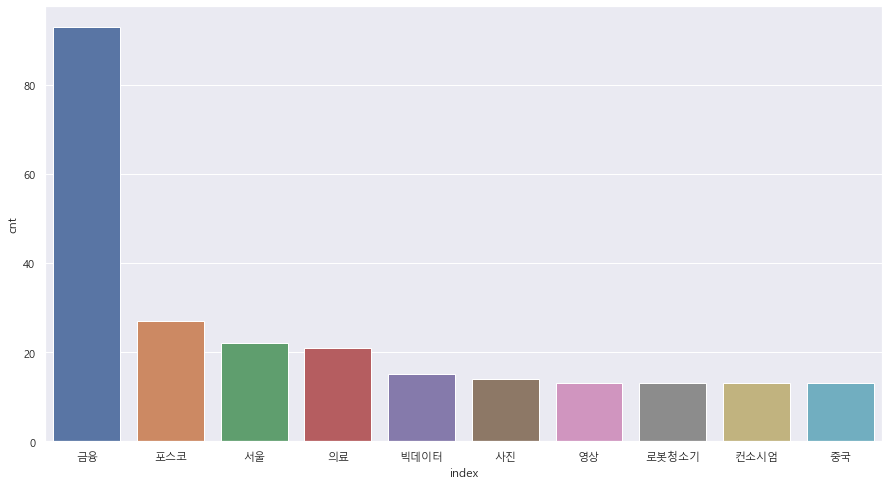

In [325]:
sns.barplot(x='index', y='cnt', data=df1, orient='v')

## wordcloud

In [277]:
wordcloud = WordCloud(font_path = '../03_Visualization/dataset/malgun.ttf', 
                       background_color='white', colormap='cool', 
                       width=1500, height=1500).generate_from_frequencies(data1)

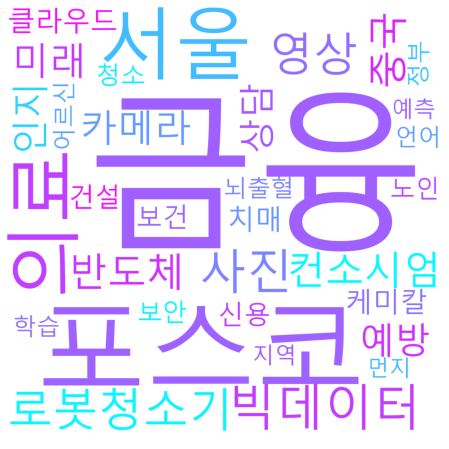

In [288]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(wordcloud)

## 불용어 처리 안한 것

In [291]:
wordcloud1 = WordCloud(font_path = '../03_Visualization/dataset/malgun.ttf', 
                       background_color='white', colormap='cool', 
                       width=3000, height=3000).generate_from_frequencies(data)

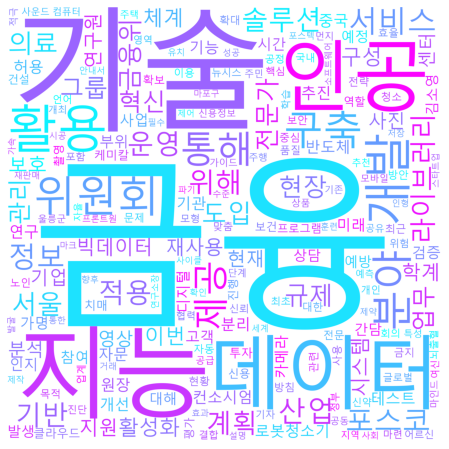

In [292]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(wordcloud1)

# 기타 테스트

## 데이터 프레임끼리 합치기

In [16]:
df1 = pd.DataFrame([[1,2,3],[4,5,6]])
df1

,0,1,2
0,1,2,3
1,4,5,6


In [17]:
df2 = pd.DataFrame([[1,2,3],[7,8,9]])
df2

,0,1,2
0,1,2,3
1,7,8,9


In [19]:
pd.concat([df1, df2])

,0,1,2
0,1,2,3
1,4,5,6
0,1,2,3
1,7,8,9


## display, start 파라미터 테스트

In [34]:
df = getNewsAbout('AI', display=10, start=1)

In [35]:
df.head()

,title,originallink,link,description,pubDate
0,삼성전자 ‘<b>AI</b> 챌린지’,https://www.chosun.com/economy/tech_it/2022/08...,https://n.news.naver.com/mnews/article/023/000...,"대학생·대학원생 대상 공모전, 반도체·디스플레이 인력 발굴 삼성전자가 국내 대학·대...","Mon, 08 Aug 2022 04:55:00 +0900"
1,"KT·서울성모병원, 당뇨 관리 돕는 <b>AI</b> 기술 개발",https://biz.chosun.com/it-science/ict/2022/08/...,https://n.news.naver.com/mnews/article/366/000...,각각 <b>AI</b>(인공지능) 역량과 의료 데이터를 결합한다는 계획이다. 우선 ...,"Mon, 08 Aug 2022 09:12:00 +0900"
2,"삼성전자, <b>AI</b>인재 키워 반도체·디스플레이 연구한다",https://zdnet.co.kr/view/?no=20220807083406,https://n.news.naver.com/mnews/article/092/000...,삼성전자가 인공지능(<b>AI</b>) 분야 우수 인력을 발굴해 반도체·디스플레이를...,"Sun, 07 Aug 2022 11:01:00 +0900"
3,“일주일내 범죄 발생 예측 정확도 90%” <b>AI</b> 도입 득될까?,https://www.hani.co.kr/arti/science/future/105...,https://n.news.naver.com/mnews/article/028/000...,영화에서는 초능력자의 뇌를 통해 예측했지만 오늘날은 빅데이터와 인공지능(<b>AI<...,"Mon, 08 Aug 2022 09:03:00 +0900"
4,삼성전자 대학·대학원생 대상 ‘<b>AI</b> 챌린지’,https://news.kmib.co.kr/article/view.asp?arcid...,https://n.news.naver.com/mnews/article/005/000...,삼성전자는 국내 대학·대학원생을 대상으로 ‘2022 삼성 <b>AI</b> 챌린지’...,"Mon, 08 Aug 2022 04:08:00 +0900"


In [36]:
df1=getNewsAbout('AI', display=10, start=11)

In [37]:
df1.head()

,title,originallink,link,description,pubDate
0,"삼성전자, <b>AI</b> 우수 인력 발굴 2022 삼성 <b>AI</b> 챌린지 개최",https://biz.chosun.com/it-science/ict/2022/08/...,https://n.news.naver.com/mnews/article/366/000...,삼성전자는 7일 인공지능(<b>AI</b>) 우수 인력을 발굴하고 반도체·디스플레이...,"Sun, 07 Aug 2022 11:01:00 +0900"
1,"삼성전자, &apos;<b>AI</b> 챌린지&apos; 개최…&quot;<b>AI...",https://www.news1.kr/articles/4765418,https://n.news.naver.com/mnews/article/421/000...,삼성전자는 인공지능(<b>AI</b>) 분야 우수 인력 발굴과 반도체·디스플레이 분...,"Sun, 07 Aug 2022 11:00:00 +0900"
2,"삼성전자, &apos;2022 삼성 <b>AI</b> 챌린지&apos; 개최",https://www.dailian.co.kr/news/view/1140226/?s...,https://n.news.naver.com/mnews/article/119/000...,"삼성전자가 인공지능(<b>AI</b>) 분야 우수 인력 발굴과 반도체, 디스플레이 ...","Sun, 07 Aug 2022 11:00:00 +0900"
3,"삼성전자, 대학·대학원생 대상 &apos;2022 <b>AI</b> 챌린지&apos...",http://moneys.mt.co.kr/news/mwView.php?no=2022...,https://n.news.naver.com/mnews/article/417/000...,"삼성전자가 인공지능(<b>AI</b>) 분야 우수 인력 발굴과 반도체, 디스플레이 ...","Mon, 08 Aug 2022 08:04:00 +0900"
4,"삼성전자, &apos;2022 삼성 <b>AI</b> 챌린지&apos; 개최",https://biz.newdaily.co.kr/site/data/html/2022...,https://biz.newdaily.co.kr/site/data/html/2022...,뉴데일리 이성진 기자 = 삼성전자는 인공지능(<b>AI</b>) 분야 우수 인력 발...,"Sun, 07 Aug 2022 12:00:00 +0900"


In [43]:
df2 = getNewsAbout('AI', display=20, start=1)

In [41]:
df.title

0                                 삼성전자 ‘<b>AI</b> 챌린지’
1                  KT·서울성모병원, 당뇨 관리 돕는 <b>AI</b> 기술 개발
2                  삼성전자, <b>AI</b>인재 키워 반도체·디스플레이 연구한다
3            “일주일내 범죄 발생 예측 정확도 90%” <b>AI</b> 도입 득될까?
4                      삼성전자 대학·대학원생 대상 ‘<b>AI</b> 챌린지’
5                 KT, 공감하는 <b>AI</b>로 ‘사람다운’ 로봇 세상 만든다
6                      아마존, <b>AI</b> 로봇 진심 ‘아이로봇’ 품었다
7            삼성전자, &apos;제2회 삼성 <b>AI</b> 챌린지&apos; 개최
8    삼성전자, 국내 대학·대학원생 대상 &apos;2022 삼성 <b>AI</b> 챌린...
9    삼성전자, 대학·대학원생 대상 &apos;2022 삼성 <b>AI</b> 챌린지&a...
Name: title, dtype: object

In [42]:
df1.title

0    삼성전자, <b>AI</b> 우수 인력 발굴 2022 삼성 <b>AI</b> 챌린지 개최
1    삼성전자, &apos;<b>AI</b> 챌린지&apos; 개최…&quot;<b>AI...
2           삼성전자, &apos;2022 삼성 <b>AI</b> 챌린지&apos; 개최
3    삼성전자, 대학·대학원생 대상 &apos;2022 <b>AI</b> 챌린지&apos...
4           삼성전자, &apos;2022 삼성 <b>AI</b> 챌린지&apos; 개최
5             삼성전자, <b>AI</b> 챌린지 개최…반도체 난제 해결할 인재 찾는다
6           삼성전자, &apos;2022 삼성 <b>AI</b> 챌린지&apos; 개최
7                   삼성전자, &apos;<b>AI</b> 챌린지&apos; 개최
8    타임게이트, NIA ‘2022년 <b>AI</b> 학습용 데이터 구축’ 6개 분야 ...
9    삼성전자, <b>AI</b> 인재 발굴 나선다…‘2022 삼성 <b>AI</b> 챌...
Name: title, dtype: object

In [44]:
df2.title

0                                  삼성전자 ‘<b>AI</b> 챌린지’
1                   KT·서울성모병원, 당뇨 관리 돕는 <b>AI</b> 기술 개발
2                   삼성전자, <b>AI</b>인재 키워 반도체·디스플레이 연구한다
3             “일주일내 범죄 발생 예측 정확도 90%” <b>AI</b> 도입 득될까?
4                       삼성전자 대학·대학원생 대상 ‘<b>AI</b> 챌린지’
5                  KT, 공감하는 <b>AI</b>로 ‘사람다운’ 로봇 세상 만든다
6                       아마존, <b>AI</b> 로봇 진심 ‘아이로봇’ 품었다
7             삼성전자, &apos;제2회 삼성 <b>AI</b> 챌린지&apos; 개최
8     삼성전자, 국내 대학·대학원생 대상 &apos;2022 삼성 <b>AI</b> 챌린...
9     삼성전자, 대학·대학원생 대상 &apos;2022 삼성 <b>AI</b> 챌린지&a...
10    삼성전자, <b>AI</b> 우수 인력 발굴 2022 삼성 <b>AI</b> 챌린지 개최
11    삼성전자, &apos;<b>AI</b> 챌린지&apos; 개최…&quot;<b>AI...
12           삼성전자, &apos;2022 삼성 <b>AI</b> 챌린지&apos; 개최
13    삼성전자, 대학·대학원생 대상 &apos;2022 <b>AI</b> 챌린지&apos...
14           삼성전자, &apos;2022 삼성 <b>AI</b> 챌린지&apos; 개최
15             삼성전자, <b>AI</b> 챌린지 개최…반도체 난제 해결할 인재 찾는다
16           삼성전자, &apos;2022 삼성 <b>AI</b> 챌린지&apos; 개최
17                   삼성전자, &apos;<b>AI</b> 챌린지&a